### Data Preprocesing

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [145]:
path_to_csv = '/content/drive/My Drive/Project Portfolio/Investigate Business Hotel using Data Visualization/hotel_bookings_data.csv'
df = pd.read_csv(path_to_csv)
pd.set_option('display.max_columns', None)
df.head(100)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.00,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,107.00,0,0,Check-Out
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,0.0,0,Full Board,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,303.0,NaN,0,Personal,103.00,0,1,Check-Out
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,82.00,0,1,Canceled
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,0.0,0,Dinner,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,15.0,NaN,0,Personal,105.50,0,0,Canceled


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [147]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [148]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Handling Missing Value

#### Children

In [149]:
children_counts = df['children'].value_counts(dropna=False)
print("Unique values and counts for 'children' column (including null values):\n", children_counts)

Unique values and counts for 'children' column (including null values):
 0.0     110796
1.0       4861
2.0       3652
3.0         76
NaN          4
10.0         1
Name: children, dtype: int64


In [150]:
#Replace missing values with the most frequently occurring value.
df['children'].fillna(df['children'].mode()[0], inplace=True)

In [151]:
#Change into INT
df['children'] = df['children'].astype(int)

#### City

In [152]:
pd.set_option('display.max_rows', None)
city_counts = df['city'].value_counts(dropna=False).head(30)
print("Unique values and counts for 'city' column (including null values):\n", city_counts)

Unique values and counts for 'city' column (including null values):
 Kota Denpasar                 48590
Kabupaten Bangka              12129
Kota Yogyakarta               10415
Kota Batu                      8568
Kabupaten Bandung              7287
Kabupaten Kepulauan Seribu     3766
Kota Malang                    3375
Kabupaten Magelang             2342
Kota Jakarta Barat             2224
Kabupaten Belitung             2104
Kabupaten Sleman               2097
Kabupaten Sumedang             1730
Kota Jakarta Timur             1279
Kabupaten Garut                1263
Kota Surabaya                  1024
Kota Cimahi                     999
Kota Bogor                      919
Kabupaten Pangandaran           669
Kota Jakarta Selatan            632
Kota Semarang                   607
Kabupaten Tangerang             500
NaN                             488
Kota Bengkulu                   447
Kota Jakarta Pusat              435
Kota Jakarta Utara              426
Kabupaten Pandeglang           

In [153]:
#Replace missing values with the most frequently occurring value.
df['city'].fillna(df['city'].mode()[0], inplace=True)

####Agent

In [154]:
pd.set_option('display.max_rows', None)

# Display the unique values and counts for 'agent' column
agent_counts = df['agent'].value_counts(dropna=False).head(10)
print("Unique values and counts for 'agent' column (including null values):\n", agent_counts)

Unique values and counts for 'agent' column (including null values):
 9.0      31961
NaN      16340
240.0    13922
1.0       7191
14.0      3640
7.0       3539
6.0       3290
250.0     2870
241.0     1721
28.0      1666
Name: agent, dtype: int64


In [155]:
#Drop columns with high missing values
df.drop('agent', axis=1, inplace=True)

####Company

In [156]:
pd.set_option('display.max_rows', None)

# Display the unique values and counts for 'company' column
company_counts = df['company'].value_counts(dropna=False).head(10)
print("Unique values and counts for 'company' column (including null values):\n", company_counts)

Unique values and counts for 'company' column (including null values):
 NaN      112593
40.0        927
223.0       784
67.0        267
45.0        250
153.0       215
174.0       149
219.0       141
281.0       138
154.0       133
Name: company, dtype: int64


In [157]:
#Drop columns with high missing values
df.drop('company', axis=1, inplace=True)

####Meal

In [158]:
pd.set_option('display.max_rows', None)
meal_counts = df['meal'].value_counts(dropna=False)
print("Unique values and counts for 'meal' column (including null values):\n", meal_counts)

Unique values and counts for 'meal' column (including null values):
 Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64


In [159]:
# Replace 'Undefined' with 'Full Board' in the 'meal' column
df['meal'].replace('Undefined', 'Full Board', inplace=True)

In [161]:
pd.set_option('display.max_rows', None)
meal_counts = df['meal'].value_counts(dropna=False)
print("Unique values and counts for 'meal' column (including null values):\n", meal_counts)

Unique values and counts for 'meal' column (including null values):
 Breakfast     92310
Dinner        14463
No Meal       10650
Full Board     1967
Name: meal, dtype: int64


###Data Processing

####Monthly Hotel Booking Analysis Based on Hotel Type

#####The total booking count for each month based on hotel

In [162]:
# Get unique counts of values in the 'hotel' column
unique_counts1 = df['arrival_date_year'].value_counts()

# Display the unique counts
print("Unique counts of values in the 'hotel' column:")
print(unique_counts1)

Unique counts of values in the 'hotel' column:
2018    56707
2019    40687
2017    21996
Name: arrival_date_year, dtype: int64


In [163]:
unique_counts = df['hotel'].value_counts()
print(unique_counts)

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64


In [164]:
# Define the order of months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert 'arrival_date_month' to a categorical variable with the specified order
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

# Group by 'hotel' and 'arrival_date_month', and count the occurrences
grouped_data = df.groupby(['hotel', 'arrival_date_month']).size().reset_index(name='booking_count')

# Pivot the table to have 'hotel' as columns and 'arrival_date_month' as rows
pivot_table = grouped_data.pivot_table(index='arrival_date_month', columns='hotel', values='booking_count', fill_value=0)

# Display the resulting table
print("Table showing the total booking count for each month based on hotel:")
print(pivot_table)

Table showing the total booking count for each month based on hotel:
hotel               City Hotel  Resort Hotel
arrival_date_month                          
January                   4357          2437
February                  4132          2648
March                     3736          2193
April                     4965          3103
May                       6458          3336
June                      7480          3609
July                      8232          3559
August                    7894          3045
September                 8088          4573
October                   8983          4894
November                  7400          3108
December                  7605          3555


####Normalize data

In [165]:
# Select only data for September and October
selected_data = pivot_table.loc[['September', 'October']]

# Normalize the data using Z-score normalization
scaler = StandardScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(selected_data), index=selected_data.index, columns=selected_data.columns)

# Display the normalized data
print("Normalized data for the months of September and October using Z-score normalization:")
print(normalized_data)

Normalized data for the months of September and October using Z-score normalization:
hotel               City Hotel  Resort Hotel
arrival_date_month                          
September                 -1.0          -1.0
October                    1.0           1.0


#####Visualization

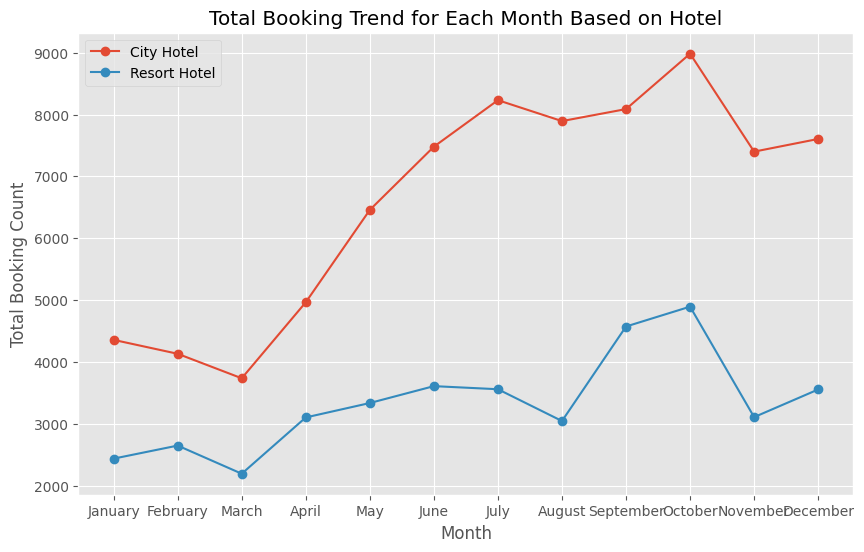

In [166]:
# Pivot the table to have 'hotel' as columns and 'arrival_date_month' as rows
pivot_table = grouped_data.pivot_table(index='arrival_date_month', columns='hotel', values='booking_count', fill_value=0)

# Plotting the line chart
plt.figure(figsize=(10, 6))
for hotel in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[hotel], label=hotel, marker='o')

plt.title('Total Booking Trend for Each Month Based on Hotel')
plt.xlabel('Month')
plt.ylabel('Total Booking Count')
plt.legend()
plt.grid(True)
plt.show()

###Data

In [167]:
df['total_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_duration
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0,Personal,0.0,0,0,Check-Out,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0,Personal,0.0,0,0,Check-Out,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,Personal,75.0,0,0,Check-Out,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,0,Personal,75.0,0,0,Check-Out,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,0,Personal,98.0,0,1,Check-Out,2


In [168]:
duration_counts = df['total_duration'].value_counts()
duration_counts

2     27643
3     27076
1     21020
4     17383
7      8655
5      7784
6      3857
8      1161
10     1139
14      916
9       841
0       715
11      396
12      223
13      142
15       75
21       71
16       40
25       37
18       35
28       35
19       22
17       20
29       14
20       14
22       14
30       13
23        8
24        6
26        6
27        5
35        5
42        4
33        3
56        2
34        1
57        1
49        1
48        1
69        1
38        1
45        1
60        1
46        1
43        1
Name: total_duration, dtype: int64

In [204]:
bins = [-1, 2, 5, 10, float('inf')]
labels = ['Short Stays', 'Medium Stays', 'Extended Stays', 'Long Stays']
df['duration_category'] = pd.cut(df['total_duration'], bins=bins, labels=labels)

# Display the DataFrame with the new column
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_duration,duration_category
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0,Personal,0.0,0,0,Check-Out,0,Short Stays
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0,Personal,0.0,0,0,Check-Out,0,Short Stays
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,Personal,75.0,0,0,Check-Out,1,Short Stays
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,0,Personal,75.0,0,0,Check-Out,1,Short Stays
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,0,Personal,98.0,0,1,Check-Out,2,Short Stays


In [170]:
# Calculate the total duration for each category and hotel
duration_category_totals = df.groupby(['hotel', 'duration_category'])['total_duration'].sum().reset_index()

# Pivot the table for better comparison
duration_category_pivot = duration_category_totals.pivot(index='hotel', columns='duration_category', values='total_duration').reset_index()

# Rename columns for clarity
duration_category_pivot.columns.name = None  # Remove the column name for better visualization

# Display the comparison
print(duration_category_pivot)

          hotel  Short Stays  Medium Stays  Extended Stays  Long Stays
0    City Hotel        56124        139356           33754        7022
1  Resort Hotel        20182         50324           78220       24275


<ipython-input-202-731e65e37124>:19: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(handles, labels=legend_labels.values(), title='Duration Category')


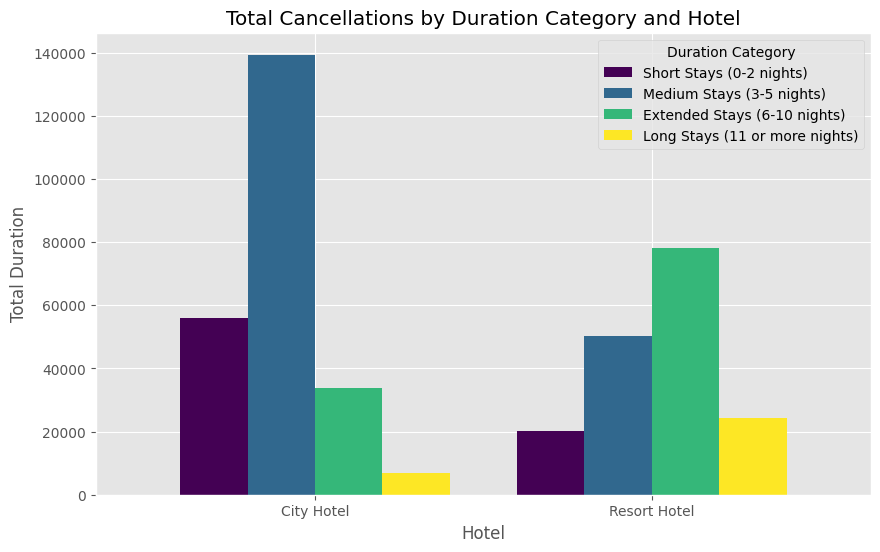

In [202]:
# Plotting
ax = duration_category_pivot.set_index('hotel').plot(kind='bar', figsize=(10, 6), colormap='viridis', width=0.8)
plt.title('Total Cancellations by Duration Category and Hotel')
plt.xlabel('Hotel')
plt.ylabel('Total Duration')

# Rotate x-axis labels vertically
plt.xticks(rotation=0)

# Add legend with custom labels and descriptions for each duration category
legend_labels = {
    'Short Stays': 'Short Stays (0-2 nights)',
    'Medium Stays': 'Medium Stays (3-5 nights)',
    'Extended Stays': 'Extended Stays (6-10 nights)',
    'Long Stays': 'Long Stays (11 or more nights)'
}

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, labels=legend_labels.values(), title='Duration Category')
plt.xticks(rotation=0)

plt.show()

####Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [212]:
import pandas as pd

# Assuming 'df' is your DataFrame
# You can read the dataset using: df = pd.read_csv('your_dataset.csv')

# Define lead_time categories
lead_time_bins = [-1, 7, 30, float('inf')]
lead_time_labels = ['1 week before', '1 month before', 'more than 1 month']

# Cut lead_time into categories
df['lead_time_category'] = pd.cut(df['lead_time'], bins=lead_time_bins, labels=lead_time_labels, include_lowest=True, right=False)

# Count occurrences of each lead_time category
lead_time_counts = df['lead_time_category'].value_counts()

# Display the counts
print(lead_time_counts)

more than 1 month    81343
1 month before       19632
1 week before        18415
Name: lead_time_category, dtype: int64


In [213]:
# Define lead_time categories
lead_time_bins = [-1, 7, 30, float('inf')]
lead_time_labels = ['1 week before', '1 month before', 'more than 1 month']

# Cut lead_time into categories and create a new column
df['lead_time_category'] = pd.cut(df['lead_time'], bins=lead_time_bins, labels=lead_time_labels, include_lowest=True, right=False)

# Display the DataFrame with the new column
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_duration,duration_category,lead_time_category
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0,Personal,0.0,0,0,Check-Out,0,Short Stays,more than 1 month
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0,Personal,0.0,0,0,Check-Out,0,Short Stays,more than 1 month
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,Personal,75.0,0,0,Check-Out,1,Short Stays,1 month before
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,0,Personal,75.0,0,0,Check-Out,1,Short Stays,1 month before
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,0,Personal,98.0,0,1,Check-Out,2,Short Stays,1 month before


In [214]:
# Filter the DataFrame for canceled bookings
canceled_bookings = df[df['is_canceled'] == 1]

# Create a pivot table for better comparison
canceled_lead_time_pivot = canceled_bookings.pivot_table(index='hotel', columns='lead_time_category', values='is_canceled', aggfunc='count', fill_value=0)

# Rename columns for clarity
canceled_lead_time_pivot.columns = ['1 week before', '1 month', 'more than 1 month']

# Display the table
print(canceled_lead_time_pivot)

              1 week before  1 month  more than 1 month
hotel                                                  
City Hotel             1202     3813              28087
Resort Hotel            528     1399               9195


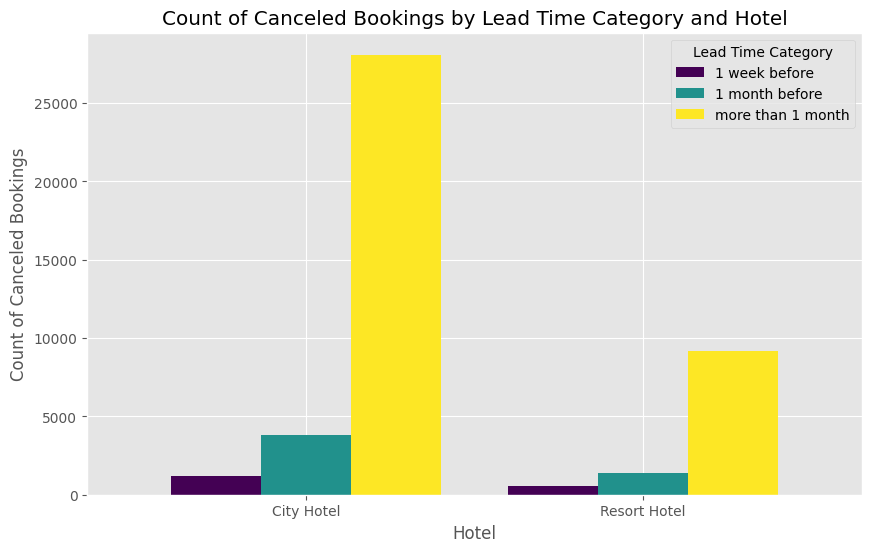

In [216]:
# Filter the DataFrame for canceled bookings
canceled_bookings = df[df['is_canceled'] == 1]

# Create a pivot table for better comparison
canceled_lead_time_pivot = canceled_bookings.pivot_table(index='hotel', columns='lead_time_category', values='is_canceled', aggfunc='count', fill_value=0)

# Rename columns for clarity
canceled_lead_time_pivot.columns = ['1 week before', '1 month before', 'more than 1 month']

# Plotting
ax = canceled_lead_time_pivot.plot(kind='bar', figsize=(10, 6), colormap='viridis', width=0.8)
plt.title('Count of Canceled Bookings by Lead Time Category and Hotel')
plt.xlabel('Hotel')
plt.ylabel('Count of Canceled Bookings')

# Rotate x-axis labels vertically
plt.xticks(rotation=0)

# Add legend
plt.legend(title='Lead Time Category')

plt.show()